In [13]:
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

In [14]:
path = "../HW3/"
ratios = [0.1, 0.3, 0.5, 0.7, 0.9, 1, 1.5, 3, 5]
corrs = ["Unified", "Correlated", "Strongly correlated"]
distrs = ["Light", "Balanced", "Heavy"]
grans = [0, 0.3, 0.5, 0.7, 1, 1.5, 3, 5]
maxParams = [100, 300, 500, 700, 1000, 1500, 3000, 5000, 10000]

In [15]:
Algo = namedtuple("Algo", "ratio corr distr light heavy weight cost")
AlgoResults = namedtuple("AlgoResults", "confs times results")

def dataOfAlgo(algoName):
  algoratio = dataOfFile(path + algoName + "_ratio")
  algocorr = dataOfFile(path + algoName + "_corr")
  algodistr = dataOfFile(path + algoName + "_distr")
  algolight = dataOfFile(path + algoName + "_light")
  algoheavy = dataOfFile(path + algoName + "_heavy")
  algoweight = dataOfFile(path + algoName + "_weight")
  algocost = dataOfFile(path + algoName + "_cost")
  return Algo(algoratio, algocorr, algodistr, algolight, algoheavy, algoweight, algocost)

def dataOfFile(filename):
  lines = ''.join(readFile(filename))
  segments = lines.split("=")
  confs = segmentToValues(segments[0])
  times = segmentToValues(segments[1])
  results = segmentToValues(segments[2])
  return AlgoResults(confs, times, results)

def segmentToValues(segment):
  instanceSizes = segment.split("\n")
  result = []
  for i in instanceSizes:
    if(len(i) > 1):
      values = list(map(int, i.split(" ")))
      result.append(values)
  return result

def readFile(filename):
  with open(path + filename) as f:
    lines = f.readlines()
    return lines

In [16]:
bb = dataOfAlgo("BranchBound")
dp = dataOfAlgo("DynamicProgrammingPrice")
gr = dataOfAlgo("Greedy")

print(len(bb.ratio.times))
print(len(bb.corr.times))
print(len(bb.distr.times))
print(len(bb.light.times))
print(len(bb.heavy.times))
print(len(bb.weight.times))
print(len(bb.cost.times))

assert(len(bb.ratio.times) == len(ratios))
assert(len(bb.corr.times) == len(corrs))
assert(len(bb.distr.times) == len(distrs))
assert(len(bb.light.times) == len(grans))
assert(len(bb.heavy.times) == len(grans))
assert(len(bb.weight.times) == len(maxParams))
assert(len(bb.cost.times) == len(maxParams))

9
3
3
8
8
9
9


In [17]:
def avg(data):
  return sum(data) / len(data)

def getMaxsPSet(data):
  maxs = []
  for f in data:
    maxs.append(max(f))
  return maxs

def getAvgsPSet(data):
  maxs = []
  for f in data:
    maxs.append(avg(f) / 1000000)
  return maxs

def getMaxs(data):
  mr = getMaxsPSet(data[0][1])
  return (mr, )

def getAvgs(data):
  ar = getAvgsPSet(data.ratio[1])
  ac = getAvgsPSet(data.corr[1])
  ad = getAvgsPSet(data.distr[1])
  al = getAvgsPSet(data.light[1])
  ah = getAvgsPSet(data.heavy[1])
  aw = getAvgsPSet(data.weight[1])
  acost = getAvgsPSet(data.cost[1])
  return (ar, ac, ad, al, ah, aw, acost)

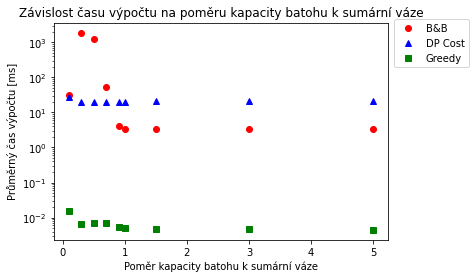

In [18]:
plt.plot(ratios, getAvgs(bb)[0], 'o', label="B&B", color="red")
plt.plot(ratios, getAvgs(dp)[0], '^', label="DP Cost", color="blue")
plt.plot(ratios, getAvgs(gr)[0], 's', label="Greedy", color="green")
plt.yscale("log")
plt.xlabel("Poměr kapacity batohu k sumární váze")
plt.ylabel("Průměrný čas výpočtu [ms]")
plt.title('Závislost času výpočtu na poměru kapacity batohu k sumární váze')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

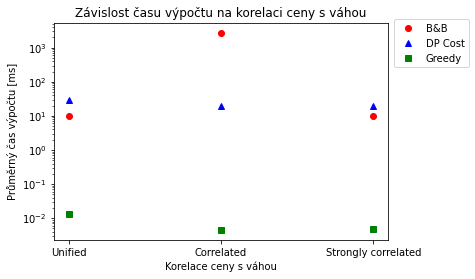

In [19]:
plt.plot(corrs, getAvgs(bb)[1], 'o', label="B&B", color="red")
plt.plot(corrs, getAvgs(dp)[1], '^', label="DP Cost", color="blue")
plt.plot(corrs, getAvgs(gr)[1], 's', label="Greedy", color="green")
plt.yscale("log")
plt.xlabel("Korelace ceny s váhou")
plt.ylabel("Průměrný čas výpočtu [ms]")
plt.title('Závislost času výpočtu na korelaci ceny s váhou')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

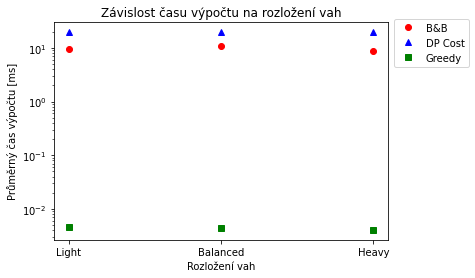

In [20]:
plt.plot(distrs, getAvgs(bb)[2], 'o', label="B&B", color="red")
plt.plot(distrs, getAvgs(dp)[2], '^', label="DP Cost", color="blue")
plt.plot(distrs, getAvgs(gr)[2], 's', label="Greedy", color="green")
plt.yscale("log")
plt.xlabel("Rozložení vah")
plt.ylabel("Průměrný čas výpočtu [ms]")
plt.title('Závislost času výpočtu na rozložení vah')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

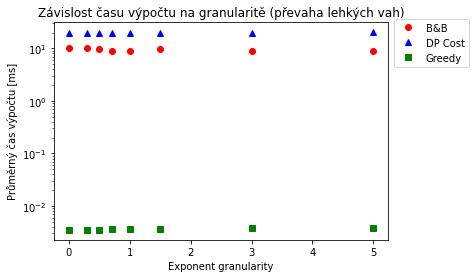

In [21]:
plt.plot(grans, getAvgs(bb)[3], 'o', label="B&B", color="red")
plt.plot(grans, getAvgs(dp)[3], '^', label="DP Cost", color="blue")
plt.plot(grans, getAvgs(gr)[3], 's', label="Greedy", color="green")
plt.yscale("log")
plt.xlabel("Exponent granularity")
plt.ylabel("Průměrný čas výpočtu [ms]")
plt.title('Závislost času výpočtu na granularitě (převaha lehkých vah)')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

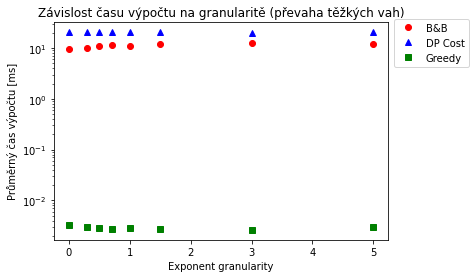

In [22]:
plt.plot(grans, getAvgs(bb)[4], 'o', label="B&B", color="red")
plt.plot(grans, getAvgs(dp)[4], '^', label="DP Cost", color="blue")
plt.plot(grans, getAvgs(gr)[4], 's', label="Greedy", color="green")
plt.yscale("log")
plt.xlabel("Exponent granularity")
plt.ylabel("Průměrný čas výpočtu [ms]")
plt.title('Závislost času výpočtu na granularitě (převaha těžkých vah)')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

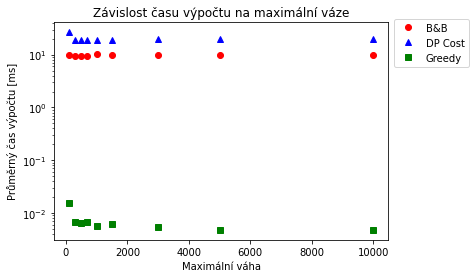

In [23]:
plt.plot(maxParams, getAvgs(bb)[5], 'o', label="B&B", color="red")
plt.plot(maxParams, getAvgs(dp)[5], '^', label="DP Cost", color="blue")
plt.plot(maxParams, getAvgs(gr)[5], 's', label="Greedy", color="green")
plt.yscale("log")
plt.xlabel("Maximální váha")
plt.ylabel("Průměrný čas výpočtu [ms]")
plt.title('Závislost času výpočtu na maximální váze')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')

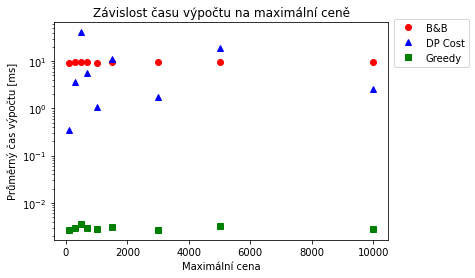

In [24]:
plt.plot(maxParams, getAvgs(bb)[6], 'o', label="B&B", color="red")
plt.plot(maxParams, getAvgs(dp)[6], '^', label="DP Cost", color="blue")
plt.plot(maxParams, getAvgs(gr)[6], 's', label="Greedy", color="green")
plt.yscale("log")
plt.xlabel("Maximální cena")
plt.ylabel("Průměrný čas výpočtu [ms]")
plt.title('Závislost času výpočtu na maximální ceně')
plt.legend(bbox_to_anchor=(1.001, 1.04), loc='upper left')